**Purpose of Analysis** - To find out the sorts of people likely to have survived the sinking of Titanic

***

<font color="blue">
Libraries used - 
    
    1. sci-kit learn
    2. pandas
    3. numpy  
    4. matplotlib
    5. seaborn
</font>

*******

<font color="green">
Steps taken - 
</font>
    
    1. Import necessary libraries
    2. Import data needed
    3. Summarise data 
        3.1. Basic information
    4. Clean data
        4.1. Dealing with missing data
        4.2. Reformatting data  
    5. Model Training
    6. Model Evaluation

## Step 1 : Importing necessary libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np

# graphing and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use( 'ggplot' )
plt.rcParams[ 'figure.figsize' ] = 8 , 6
sns.set_style( 'white' )

# helpers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# machine learning
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Functions

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) 
        # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))   

## Step 2 : Import data needed

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## Step 3 : Summarise data

**Variable Description**

    Survived: Survived (1) or died (0)
    Pclass: Passenger's class
    Name: Passenger's name
    Sex: Passenger's sex
    Age: Passenger's age
    SibSp: Number of siblings/spouses aboard
    Parch: Number of parents/children aboard
    Ticket: Ticket number
    Fare: Fare
    Cabin: Cabin
    Embarked: Port of embarkation

In [4]:
# get total nuber of rows in train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From this, I can tell that the following coloumns having missing values: Age, Cabin, Embarked

In [5]:
# check columns in the train_df
print('The following are coloumns found in train.csv:')
print(train_df.columns.values)

The following are coloumns found in train.csv:
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
# Print head of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# print tail of data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the above 10 rows, I decide to remove the following rows which will not provide more context towards the survival of the passengers: 

    - PassengerId (unnecessary)
    - Name (sex indicates gender already, pClass can tell us more about 
            them)
    - Ticket 
    - Cabin

In [8]:
# Dropping the mentioned 4 columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
# printing the top and last 5 rows again
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
# print tail of data pearson correlation coefficient
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


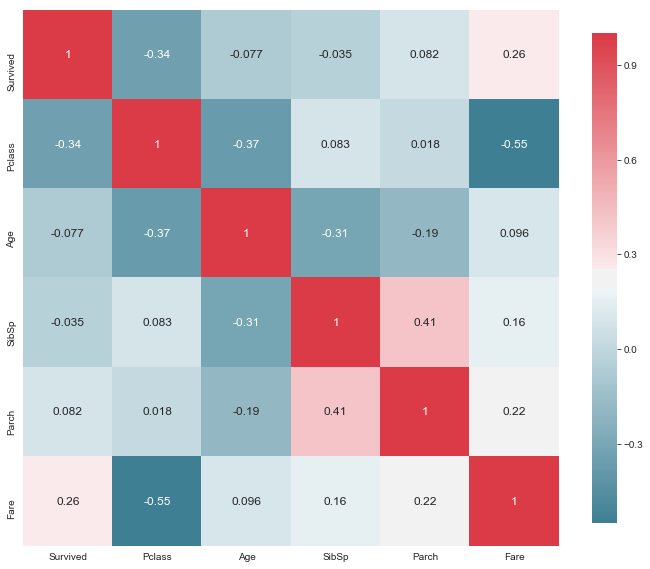

In [11]:
# plot correlation between the columns with 
plot_correlation_map(train_df)

## Step 4 : Clean data

In [12]:
# Replace male and female with values
le = LabelEncoder()
#le.fit_transform?
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
# Fill missing ages with median (28)
age_array = train_df[train_df['Age']!= np.nan]['Age']
train_df['Age'] = train_df['Age'].replace(np.nan, age_array.median())
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [14]:
# use getdummies to separate Embarked 
train_df = pd.get_dummies(train_df, columns=['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


0.9820359281437125


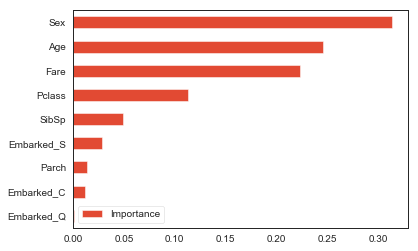

In [17]:
# 
plot_variable_importance(x_train, y_train)

## Step 5 : Model Training & Evaluation

In [16]:
# Setting up datasets for training, validation and testing
y_survived = train_df['Survived']
train_df1 = train_df.copy()
train_df1.drop('Survived', axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(train_df1, y_survived)

# use a variety of models to test the dataset I have cleaned
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

names = [
    "K-Nearest Neighbor",
    "Logistics Regression",
    "Support Vector", 
    "Neural Network",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA"
]
i = 0
for model in models:
    model.fit(x_train, y_train)
    print("Model: " + names[i])
    score1 = model.score(x_train, y_train)
    print("\tTraining Score: {}".format(score1))
    score2 = model.score(x_test, y_test)
    print("\tTesting Score:  {}".format(score2))
    #print(metrics.classification_report(expected, predicted))
    #print(metrics.confusion_matrix(expected, predicted))
    i = i+1

Model: K-Nearest Neighbor
	Training Score: 0.7769461077844312
	Testing Score:  0.7354260089686099
	Difference:     0.041520098815821305
Model: Logistics Regression
	Training Score: 0.8038922155688623
	Testing Score:  0.7937219730941704
	Difference:     0.010170242474691893
Model: Support Vector
	Training Score: 0.8847305389221557
	Testing Score:  0.7488789237668162
	Difference:     0.1358516151553395
Model: Neural Network
	Training Score: 0.6691616766467066
	Testing Score:  0.7085201793721974
	Difference:     -0.039358502725490796
Model: Gaussian Process
	Training Score: 0.9431137724550899
	Testing Score:  0.726457399103139
	Difference:     0.21665637335195087
Model: Decision Tree
	Training Score: 0.9820359281437125
	Testing Score:  0.8026905829596412
	Difference:     0.1793453451840713
Model: Random Forest
	Training Score: 0.9820359281437125
	Testing Score:  0.8116591928251121
	Difference:     0.17037673531860043
Model: AdaBoost
	Training Score: 0.8368263473053892
	Testing Score:  0.8

C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## Model Testing

**Questions to answer:**

•	How is your prediction task defined? And what is the meaning of the output variable?

•	How do you represent your data as features?

•	Did you process the features in any way?

•	Did you bring in any additional sources of data?

•	How did you select which learning algorithms to use?

•	Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

•	How do you evaluate the quality of your system?

•	How well does your system compare to a stupid baseline?

•	Can you say anything about the errors that the system makes? For a classification task, you may consider 
a confusion matrix.

•	Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)
